In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [25]:
df320 = pd.read_csv("250 f2 d0.csv")
df321 = pd.read_csv("250 f2 d1.csv")
df620 = pd.read_csv("500 f2 d0.csv")
df621 = pd.read_csv("500 f2 d1.csv")
df = pd.read_csv("500 f1 d0.csv")


In [32]:
α = [1, -2]

gamma = [[0.5, 0.0], [0.5, 1.0], [0.0, 0.5], [1.0, 0.5]]

In [8]:
df

,α1,α2,var_α1,var_α2,γ1,γ2,var_γ1,var_γ2,θ1,θ2,var_θ1,var_θ2,β1,β2,var_β1,var_β2
0,0.445879,-0.895050,0.000063,0.000016,0.347573,0.003152,0.015603,0.007302,1.994412,0.993792,0.005033,0.002047,-0.444737,-0.404149,1.345134,0.162563
1,0.446344,-0.894826,0.000051,0.000013,0.349580,0.719109,0.022394,0.011420,2.002462,0.998756,0.004489,0.001181,-0.633307,-2.510042,1.743443,1.870744
2,0.447453,-0.894272,0.000051,0.000013,-0.005714,0.354443,0.015987,0.008095,2.002929,1.002295,0.003850,0.001452,0.670376,-1.342704,0.385775,0.449079
3,0.445283,-0.895336,0.000077,0.000019,0.699121,0.351257,0.017505,0.008245,1.999168,0.994418,0.005820,0.002062,-2.949233,-1.341388,4.576266,0.541582


In [9]:
table = pd.DataFrame(columns = ['a', 'g1', 'g2'], index = gamma)

In [11]:
table['g1'].iloc[0] = 0

In [12]:
table

,a,g1,g2
[0.5 0.0],NaN,0,NaN
[0.5 1.0],NaN,NaN,NaN
[0.0 0.5],NaN,NaN,NaN
[1.0 0.5],NaN,NaN,NaN


In [26]:
df3 = df.round(4)
df3

,α1,α2,var_α1,var_α2,γ1,γ2,var_γ1,var_γ2,θ1,θ2,var_θ1,var_θ2,β1,β2,var_β1,var_β2
0,0.4459,-0.8950,0.0001,0.0,0.3476,0.0032,0.0156,0.0073,1.9944,0.9938,0.0050,0.0020,-0.4447,-0.4041,1.3451,0.1626
1,0.4463,-0.8948,0.0001,0.0,0.3496,0.7191,0.0224,0.0114,2.0025,0.9988,0.0045,0.0012,-0.6333,-2.5100,1.7434,1.8707
2,0.4475,-0.8943,0.0001,0.0,-0.0057,0.3544,0.0160,0.0081,2.0029,1.0023,0.0039,0.0015,0.6704,-1.3427,0.3858,0.4491
3,0.4453,-0.8953,0.0001,0.0,0.6991,0.3513,0.0175,0.0082,1.9992,0.9944,0.0058,0.0021,-2.9492,-1.3414,4.5763,0.5416


In [14]:
s = []
for m, v in zip(df3["γ2"], df3["var_γ2"]):
    s = "{mean:0<5}({var:0<5})".format(mean = m, var = v)
    print(s)

0.0032(0.0073)
0.7191(0.0114)
0.3544(0.0081)
0.3513(0.0082)


In [15]:
s

'0.3513(0.0082)'

In [16]:
Alpha = df[["α1", "α2"]]
Gamma = df[["γ1", "γ2"]]

In [17]:
alphak = Alpha.loc[1]
np.sum(alphak * α) / (np.linalg.norm(α)* np.linalg.norm(alphak))

0.9999995432207499

In [18]:
df["α1"] / df["α2"]

0   -0.498161
1   -0.498806
2   -0.500355
3   -0.497336
dtype: float64

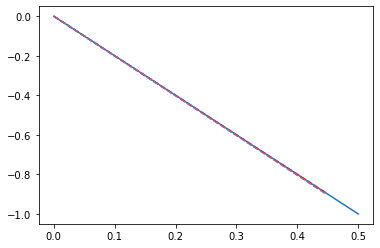

In [21]:
f = lambda x: -2.0*x
x_ = np.linspace(0, α[0]/2, 10)
plt.plot(x_, f(x_))
for k in range(0, 4):
    alphak = Alpha.loc[k]
    k = alphak[1]/alphak[0]
    fk = lambda x: k*x
    x_ = np.linspace(0, alphak[0], 10)
    plt.plot(x_, fk(x_), linestyle = "--")

In [22]:
Gamma

,γ1,γ2
0,0.347573,0.003152
1,0.349580,0.719109
2,-0.005714,0.354443
3,0.699121,0.351257


<ipython-input-35-5bc400241c0c>:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(spec[0,1])
<ipython-input-35-5bc400241c0c>:59: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot(spec[1,0])
<ipython-input-35-5bc400241c0c>:72: RuntimeWarning: divide by zero encountered in double_scalars
  k_ = gammai[1]/gammai[0]
<ipython-input-35-5bc400241c0c>:73: RuntimeWarning: invalid value encountered 

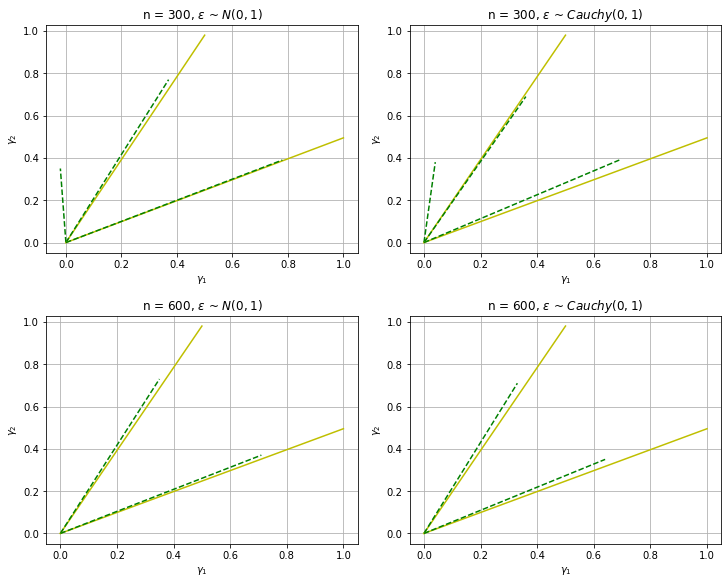

In [35]:
fig = plt.figure(figsize = [10,8], constrained_layout=True)
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
ax0 = fig.add_subplot(spec[0,0])
ax0.grid()

ax1 = fig.add_subplot(spec[0,1])
ax1.grid()

ax2 = fig.add_subplot(spec[1,0])
ax2.grid()

ax3 = fig.add_subplot(spec[1,1])
ax3.grid()

Gamma = df320[["γ1", "γ2"]].round(2)
Gamma
ax0.set_title(r"n = 300, $\epsilon$ ~ $N(0, 1)$")
ax0.set_xlabel(r"$\gamma_1$")
ax0.set_ylabel(r"$\gamma_2$")
# ax0.text(0.5,3.5, r"$\gamma$ = $(1, 4)^T$")
# ax0.text(0.12,2.2, r"$\hat \gamma$ = $({}, {})^T$".format(Gamma.loc[4][0],Gamma.loc[4][1]))
# ax0.text(3.0,0.8, r"$\gamma$ = $(4, 1)^T$")
# ax0.text(2.0,0.4, r"$\hat \gamma$ = $({}, {})^T$".format(Gamma.loc[7][0],Gamma.loc[7][1]))
for i in range(3):
    k = gamma[i + 1][1]/(gamma[i + 1][0] + 0.01)
    fk = lambda x: k*x
    x = np.linspace(0, gamma[i + 1][0], 10)
    ax0.plot(x, fk(x), c = "y")
    gammai = Gamma.loc[i + 1]
    k_ = gammai[1]/gammai[0]
    fk_ = lambda x: k_*x
    x_ = np.linspace(0, gammai[0], 10)
    ax0.plot(x_, fk_(x_), linestyle = "--", c = "g")

Gamma = df321[["γ1", "γ2"]].round(2)
Gamma
ax1.set_title(r"n = 300, $\epsilon$ ~ $Cauchy(0, 1)$")
ax1 = fig.add_subplot(spec[0,1])
ax1.set_xlabel(r"$\gamma_1$")
ax1.set_ylabel(r"$\gamma_2$")
# ax1.text(0.5,3.5, r"$\gamma$ = $(1, 4)^T$")
# ax1.text(0.12,2.2, r"$\hat \gamma$ = $({}, {})^T$".format(Gamma.loc[4][0],Gamma.loc[4][1]))
# ax1.text(3.0,0.8, r"$\gamma$ = $(4, 1)^T$")
# ax1.text(2.0,0.4, r"$\hat \gamma$ = $({}, {})^T$".format(Gamma.loc[7][0],Gamma.loc[7][1]))
for i in range(3):
    k = gamma[i + 1][1]/(gamma[i + 1][0] + 0.01)
    fk = lambda x: k*x
    x = np.linspace(0, gamma[i + 1][0], 10)
    ax1.plot(x, fk(x), c = "y")
    gammai = Gamma.loc[i + 1]
    k_ = gammai[1]/gammai[0]
    fk_ = lambda x: k_*x
    x_ = np.linspace(0, gammai[0], 10)
    ax1.plot(x_, fk_(x_), linestyle = "--", c = "g")

Gamma = df620[["γ1", "γ2"]].round(2)
Gamma
ax2.set_title(r"n = 600, $\epsilon$ ~ $N(0, 1)$")
ax2 = fig.add_subplot(spec[1,0])
ax2.set_xlabel(r"$\gamma_1$")
ax2.set_ylabel(r"$\gamma_2$")
# ax2.text(0.5,3.5, r"$\gamma$ = $(1, 4)^T$")
# ax2.text(0.12,2.2, r"$\hat \gamma$ = $({}, {})^T$".format(Gamma.loc[4][0],Gamma.loc[4][1]))
# ax2.text(3.0,0.8, r"$\gamma$ = $(4, 1)^T$")
# ax2.text(2.0,0.4, r"$\hat \gamma$ = $({}, {})^T$".format(Gamma.loc[7][0],Gamma.loc[7][1]))
for i in range(3):
    k = gamma[i + 1][1]/(gamma[i + 1][0] + 0.01)
    fk = lambda x: k*x
    x = np.linspace(0, gamma[i + 1][0], 10)
    ax2.plot(x, fk(x), c = "y")
    gammai = Gamma.loc[i + 1]
    k_ = gammai[1]/gammai[0]
    fk_ = lambda x: k_*x
    x_ = np.linspace(0, gammai[0], 10)
    ax2.plot(x_, fk_(x_), linestyle = "--", c = "g")

Gamma = df621[["γ1", "γ2"]].round(2)
Gamma
ax3.set_title(r"n = 600, $\epsilon$ ~ $Cauchy(0, 1)$")
ax3 = fig.add_subplot(spec[1,1])
ax3.set_xlabel(r"$\gamma_1$")
ax3.set_ylabel(r"$\gamma_2$")
# ax3.text(0.5,3.5, r"$\gamma$ = $(1, 4)^T$")
# ax3.text(0.12,2.2, r"$\hat \gamma$ = $({}, {})^T$".format(Gamma.loc[4][0],Gamma.loc[4][1]))
# ax3.text(3.0,0.8, r"$\gamma$ = $(4, 1)^T$")
# ax3.text(2.0,0.4, r"$\hat \gamma$ = $({}, {})^T$".format(Gamma.loc[7][0],Gamma.loc[7][1]))
for i in range(3):
    k = gamma[i + 1][1]/(gamma[i + 1][0] + 0.01)
    fk = lambda x: k*x
    x = np.linspace(0, gamma[i + 1][0], 10)
    ax3.plot(x, fk(x), c = "y")
    gammai = Gamma.loc[i + 1]
    k_ = gammai[1]/gammai[0]
    fk_ = lambda x: k_*x
    x_ = np.linspace(0, gammai[0], 10)
    ax3.plot(x_, fk_(x_), linestyle = "--", c = "g")

plt.savefig("model_2.png", format='png', bbox_inches='tight', dpi=300, transparent=True)

In [287]:
fig.savefig("model_2.png")

In [102]:
for k in range(7):
    γk = gamma[k + 1]
    gammak = Gamma.loc[k + 1]
    angle = np.sum(gammak * γk) / (np.linalg.norm(γk)* np.linalg.norm(gammak))
    print("",angle)

 0.9994215685377588
 0.9999941336742791
 0.99995613933659
 0.9997189287243002
 0.999969069416688
 0.9999975360914906
 0.9997783344796746


In [91]:
gamma

[[0, 0],
 [1.0, 0.001],
 [1.0, 1.0],
 [1.0, 2.0],
 [1.0, 4.0],
 [0.001, 1.0],
 [2.0, 1.0],
 [4.0, 1.0]]